In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
users_path = '../data/raw/ml-100k/u.user'
ratings_path = '../data/raw/ml-100k/u.data'
movies_path = '../data/raw/ml-100k/u.item'

# Load users data
users_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(users_path, sep='|', names=users_columns, encoding='latin-1')

# Load ratings data
ratings_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(ratings_path, sep='\t', names=ratings_columns, encoding='latin-1')

# Load movies data
movies_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL'] + ['genre_' + str(i) for i in range(19)]
movies = pd.read_csv(movies_path, sep='|', names=movies_columns, encoding='latin-1', usecols=range(24))


In [34]:
# Display basic info about the datasets
print("Users Dataframe:")
users.info()

Users Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [35]:
print("Users Dataframe Sample:")
users.head()

Users Dataframe Sample:


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [36]:
print("Ratings Dataframe:")
ratings.info()

Ratings Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [37]:
print("Ratings Dataframe Sample:")
ratings.head()

Ratings Dataframe Sample:


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [38]:
print("Movies Dataframe:")
movies.info()

Movies Dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   genre_0             1682 non-null   int64  
 6   genre_1             1682 non-null   int64  
 7   genre_2             1682 non-null   int64  
 8   genre_3             1682 non-null   int64  
 9   genre_4             1682 non-null   int64  
 10  genre_5             1682 non-null   int64  
 11  genre_6             1682 non-null   int64  
 12  genre_7             1682 non-null   int64  
 13  genre_8             1682 non-null   int64  
 14  genre_9             1682 non-null   int64  
 15  genre_10            1682 non-null   i

In [39]:
print("Movies Dataframe Sample:")
movies.head()

Movies Dataframe Sample:


,movie_id,title,release_date,video_release_date,IMDb_URL,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


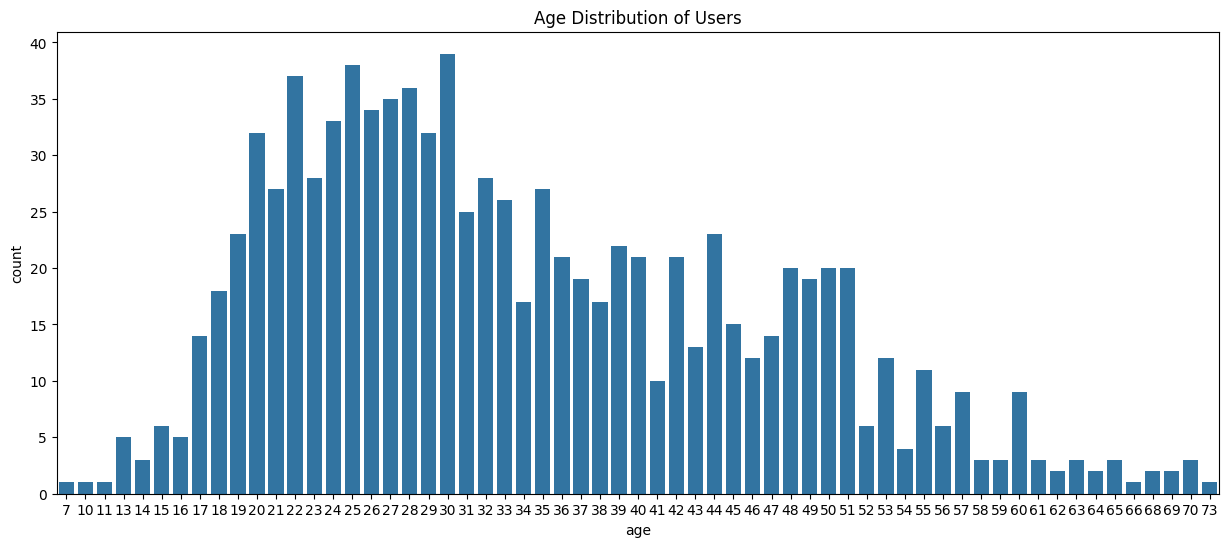

In [40]:
plt.figure(figsize=(15, 6))
sns.countplot(x='age', data=users)
plt.title('Age Distribution of Users')
plt.show()

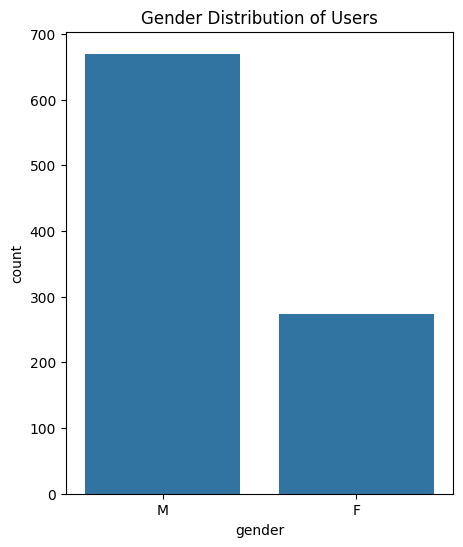

In [41]:
plt.figure(figsize=(5, 6))
sns.countplot(x='gender', data=users)
plt.title('Gender Distribution of Users')
plt.show()

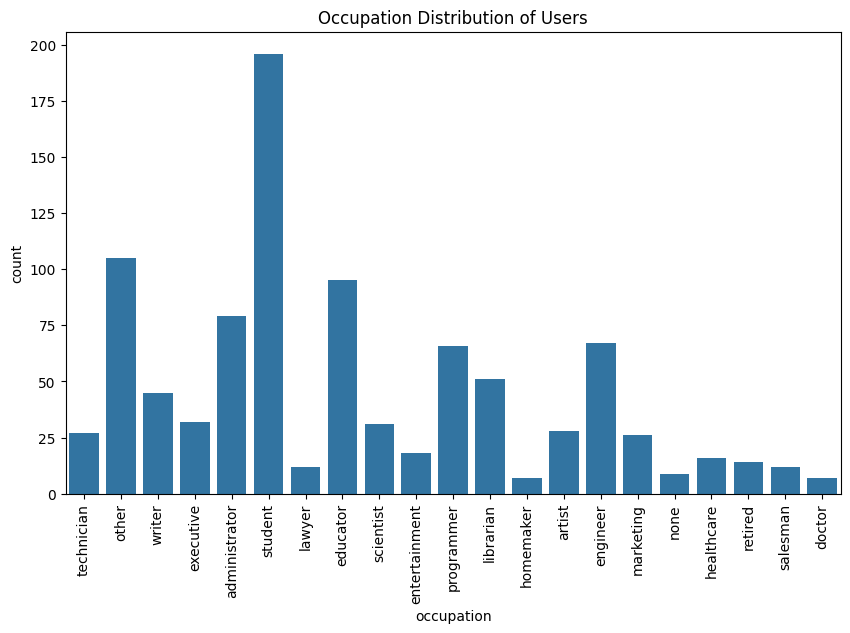

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', data=users)
plt.xticks(rotation=90)
plt.title('Occupation Distribution of Users')
plt.show()

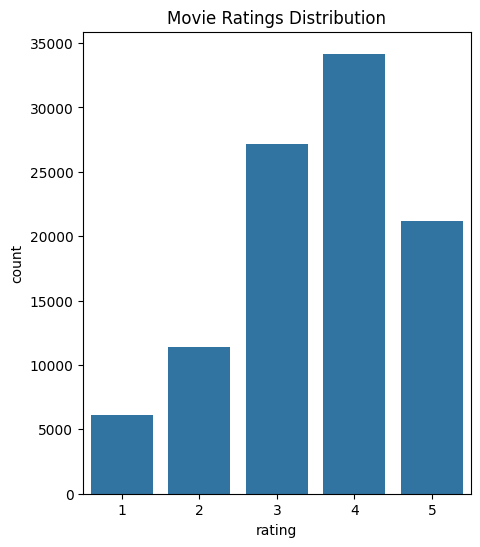

In [43]:
plt.figure(figsize=(5, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Movie Ratings Distribution')
plt.show()

In [44]:
top_rated_movies = ratings.groupby('movie_id')['rating'].mean().sort_values(ascending=False).head(10)
top_rated_movies = pd.merge(top_rated_movies, movies[['movie_id', 'title']], on='movie_id')
print("Top Rated Movies:")
top_rated_movies

Top Rated Movies:


,movie_id,rating,title
0,814,5.0,"Great Day in Harlem, A (1994)"
1,1599,5.0,Someone Else's America (1995)
2,1201,5.0,Marlene Dietrich: Shadow and Light (1996)
3,1122,5.0,They Made Me a Criminal (1939)
4,1653,5.0,Entertaining Angels: The Dorothy Day Story (1996)
5,1293,5.0,Star Kid (1997)
6,1500,5.0,Santa with Muscles (1996)
7,1189,5.0,Prefontaine (1997)
8,1536,5.0,Aiqing wansui (1994)
9,1467,5.0,"Saint of Fort Washington, The (1993)"
